In [19]:
import pysam
from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
import csv

In [20]:
fileName = '../../1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [21]:
def random_colors(num_colors):
    random_colors = []
    for _ in range(num_colors):
        random_color = list(np.random.rand(3)) 
        random_colors.append(random_color)
    return random_colors


num_colors = 27
color_list = random_colors(num_colors)
color_list

[[0.9172851732099684, 0.9581430958804197, 0.7803492223316194],
 [0.3699600652906113, 0.3918510963539643, 0.7817092878043775],
 [0.05764095422730997, 0.8955034831646207, 0.2783771486402806],
 [0.5959455699909995, 0.7911199712744839, 0.03269163460547264],
 [0.4741238177295716, 0.578852134141812, 0.3456814713392953],
 [0.2118461189578662, 0.34598802491346914, 0.034724198039543075],
 [0.525088139236505, 0.8582678612470057, 0.9065097130965021],
 [0.16268314229964298, 0.8327112927593483, 0.8030943196830579],
 [0.7766871535667462, 0.40458854952076273, 0.5981388033021582],
 [0.5501452667125585, 0.46272945350285666, 0.08260539621872165],
 [0.4689984958204878, 0.6394473102943246, 0.633168615888838],
 [0.610629652661865, 0.43123331671178433, 0.6168243849712242],
 [0.9044253513756978, 0.8032539986399964, 0.33499278756573114],
 [0.5589524515207889, 0.22138211450930978, 0.9975873665470256],
 [0.2134562341304791, 0.7007269708599199, 0.9338121268044394],
 [0.5201204622928428, 0.5913855329325687, 0.391

In [22]:
len(allcategories)

27

In [23]:
#pic2
mhc_pos_path="../../similar_region_csvfiles/posmhc.csv"
df_mhc_pos_path=pd.read_csv(mhc_pos_path)
df_race_pos=pd.read_csv("../../similar_region_race/mhc.csv")

In [24]:
df_mhc_pos_path

,Unnamed: 0,P0,P1,P00,P11,P
0,29720403,0.816740,0.383260,0.601811,0.059963,-0.166884
1,29720508,0.900562,0.299438,0.771081,0.019675,-0.099219
2,29720509,0.999750,0.200250,0.999375,0.000000,-0.000180
3,29720635,0.998876,0.201124,0.997189,0.000000,-0.000813
4,29720654,0.999750,0.200250,0.999375,0.000000,-0.000180
...,...,...,...,...,...,...
108906,33129837,0.753279,0.446721,0.494379,0.111181,-0.192122
108907,33129865,0.998126,0.201874,0.995315,0.000000,-0.001356
108908,33129951,0.999750,0.200250,0.999375,0.000000,-0.000180
108909,33129973,0.994379,0.205621,0.986259,0.000312,-0.005857


In [25]:
mhc_race_positions_dict={'ACB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'All':{'mhc':[[29720403, 30048796],[30994370, 31528792],[32212726, 32882258]]},
 'ASW': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'BEB': {'mhc': [[29720403, 30048796],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CDX': {'mhc': [[30994370, 31528792], [32212726, 32923168]]},
 'CEU': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'CHB': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CHS': {'mhc': [[30994370, 31528792], [32397207, 32882258]]},
 'CLM': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ESN': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32397207, 32882258]]},
 'FIN': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GBR': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GIH': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'GWD': {'mhc': [[29720403, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'IBS': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ITU': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'JPT': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'KHV': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32397207, 32923168]]},
 'LWK': {'mhc': [[29720403, 30011739],
   [31052133, 31528792],
   [32212726, 32923168]]},
 'MSL': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'MXL': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'PEL': {'mhc': [[29720403, 29896285],
   [30959575, 31528792],
   [32288923, 32882258]]},
 'PJL': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'PUR': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'STU': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'TSI': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'YRI': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]}}

In [26]:
zipped_color_list=dict(zip(allcategories,color_list))
zipped_color_list

{'ACB': [0.9172851732099684, 0.9581430958804197, 0.7803492223316194],
 'ASW': [0.3699600652906113, 0.3918510963539643, 0.7817092878043775],
 'All': [0.05764095422730997, 0.8955034831646207, 0.2783771486402806],
 'BEB': [0.5959455699909995, 0.7911199712744839, 0.03269163460547264],
 'CDX': [0.4741238177295716, 0.578852134141812, 0.3456814713392953],
 'CEU': [0.2118461189578662, 0.34598802491346914, 0.034724198039543075],
 'CHB': [0.525088139236505, 0.8582678612470057, 0.9065097130965021],
 'CHS': [0.16268314229964298, 0.8327112927593483, 0.8030943196830579],
 'CLM': [0.7766871535667462, 0.40458854952076273, 0.5981388033021582],
 'ESN': [0.5501452667125585, 0.46272945350285666, 0.08260539621872165],
 'FIN': [0.4689984958204878, 0.6394473102943246, 0.633168615888838],
 'GBR': [0.610629652661865, 0.43123331671178433, 0.6168243849712242],
 'GIH': [0.9044253513756978, 0.8032539986399964, 0.33499278756573114],
 'GWD': [0.5589524515207889, 0.22138211450930978, 0.9975873665470256],
 'IBS': [0.2

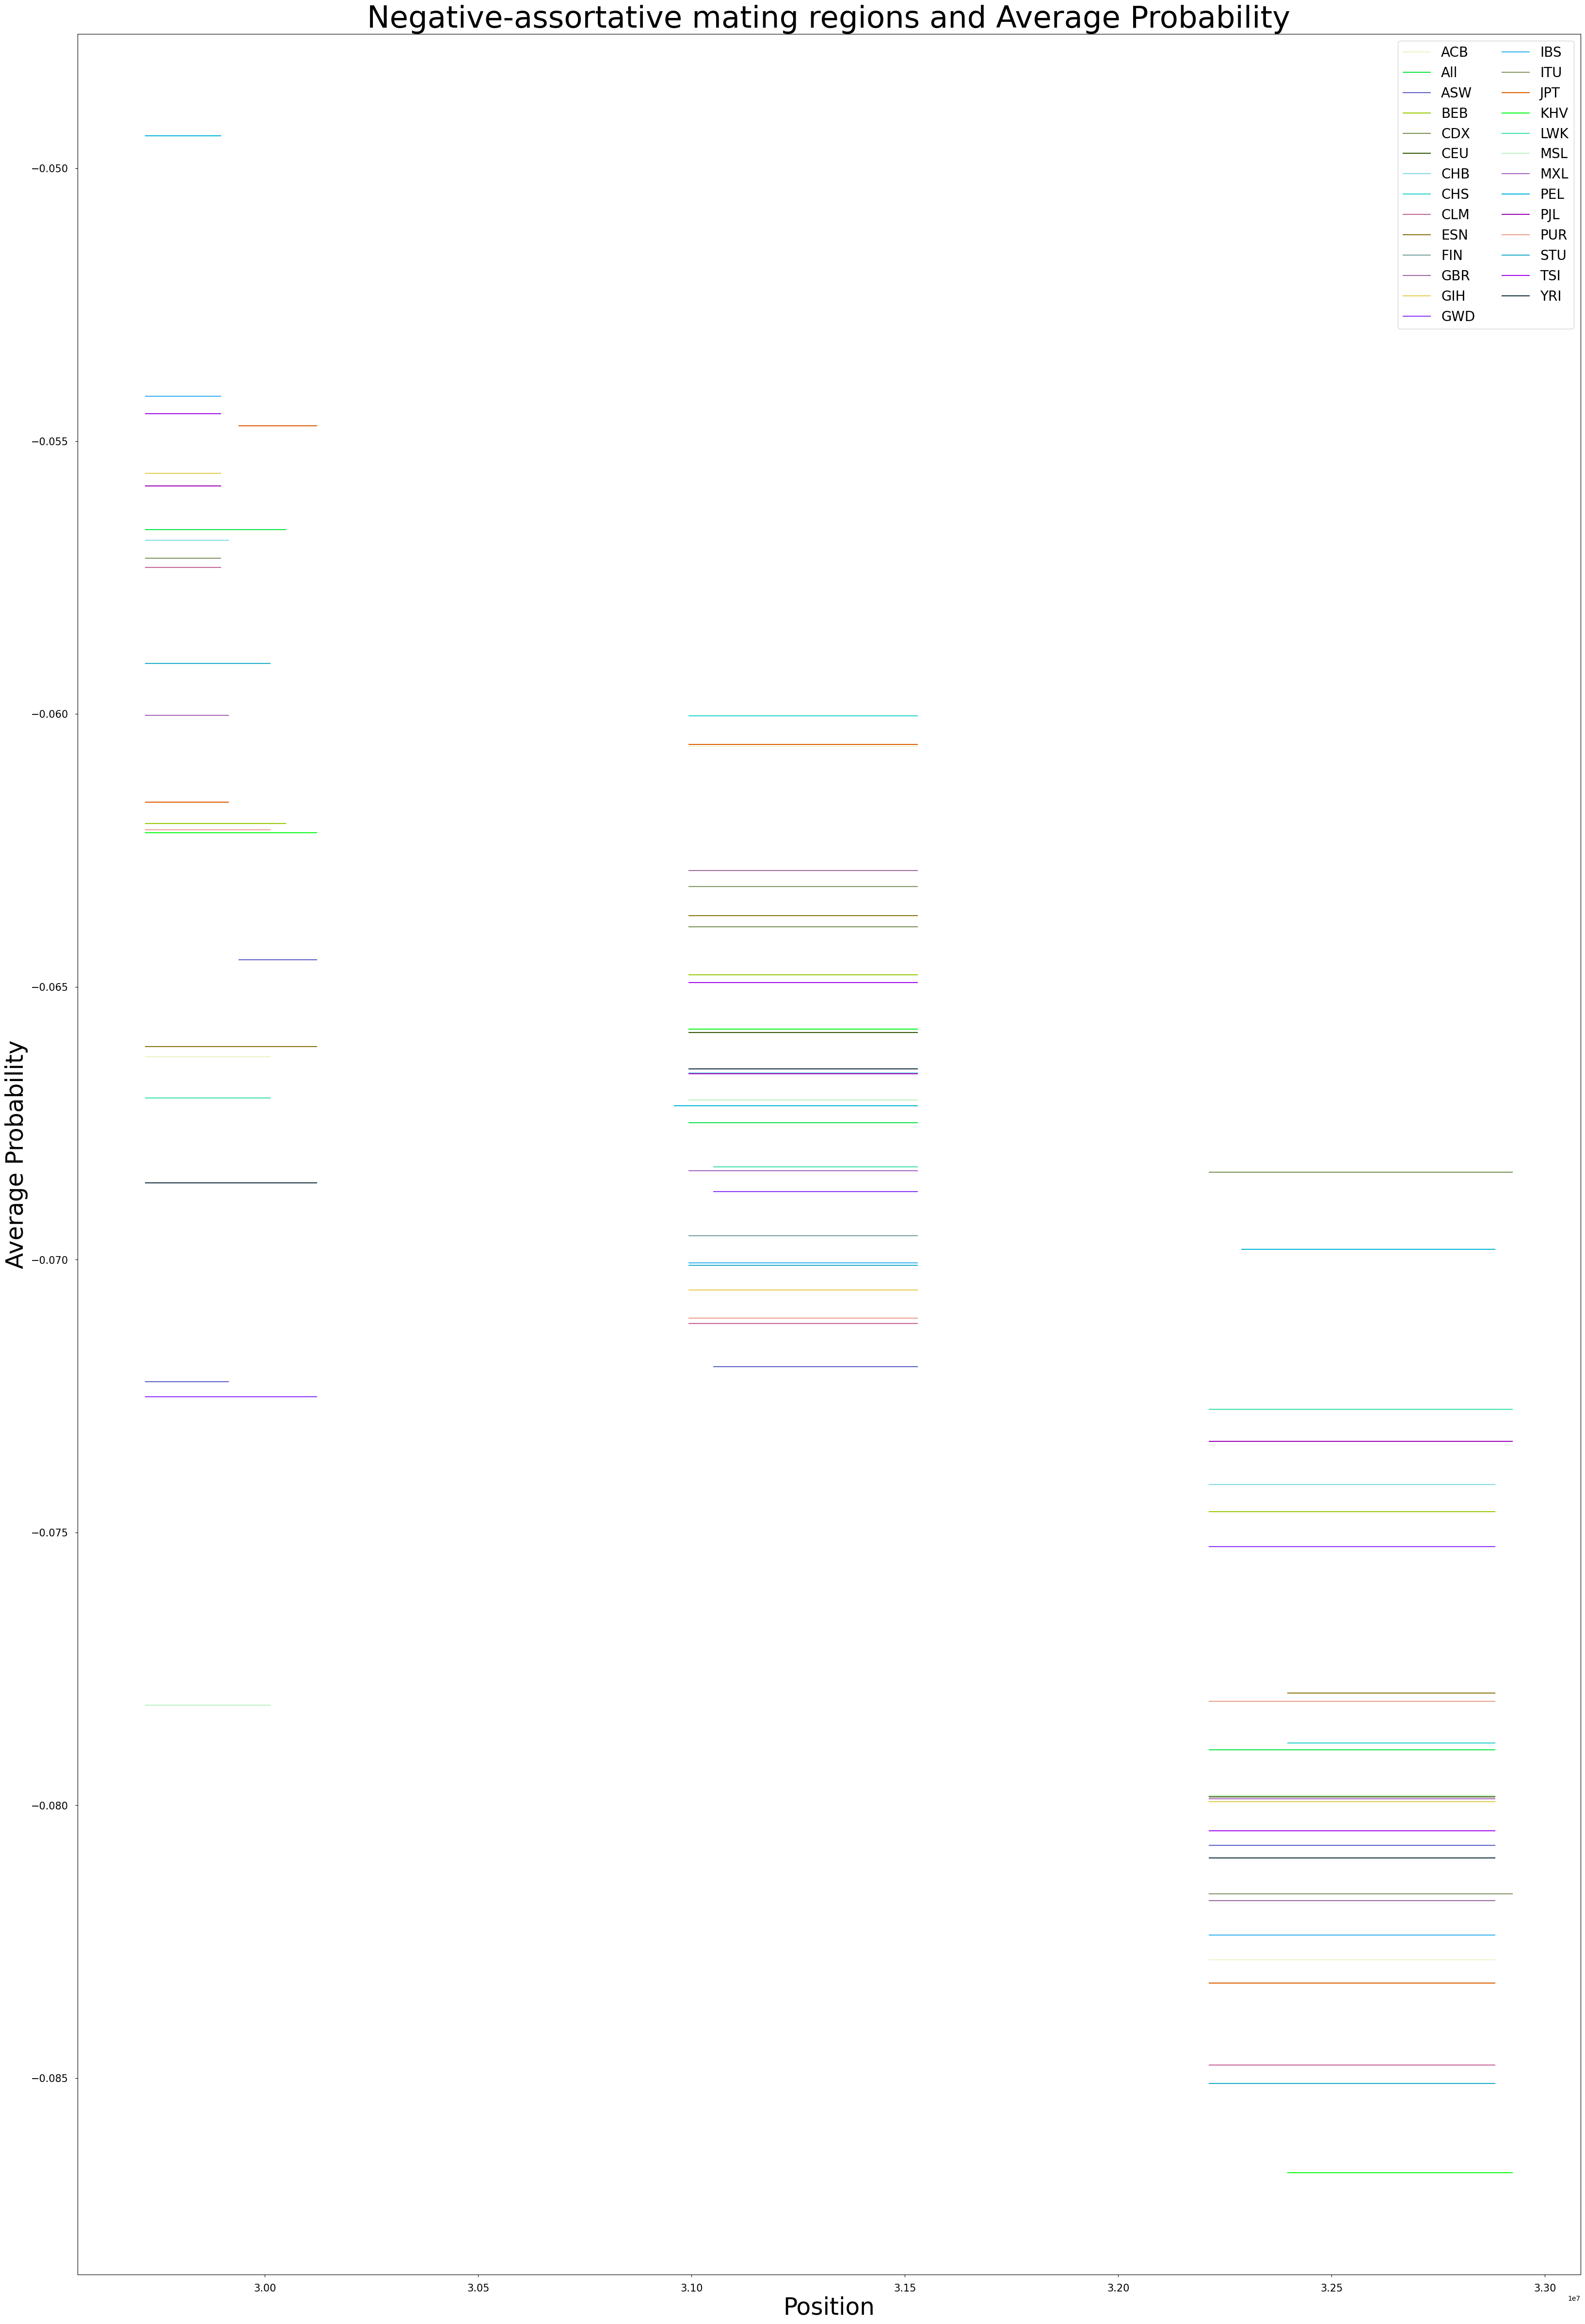

In [27]:

#{race:p-average}
result_dict=dict()
for k,vs in mhc_race_positions_dict.items():
    middledict=dict()
    if vs:
        if k=="All":            
            for v in vs["mhc"]:
                pos_P_list=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=v[0]) & (df_mhc_pos_path["Unnamed: 0"]<=v[1])]["P"].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
        else:
            for v in vs["mhc"]:
                pos_P_list=df_race_pos[(df_race_pos["Unnamed: 0"]>=v[0]) & (df_race_pos["Unnamed: 0"]<=v[1])][k].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
            

seen_races=set()
for race,middledict_items in result_dict.items():

    for region,ava in middledict_items.items():
        x=[region[0],region[1]]
        y=[ava,ava]
        plt.plot(x, y, color=zipped_color_list[race])
        if race not in seen_races:
            plt.plot([], [], color=zipped_color_list[race], label=race)
            seen_races.add(race)
            


plt.tick_params(axis='both', which='major', labelsize=15,pad=10) 
# plt.scatter(x_values1, y_values1,s=1)
plt.title("Negative-assortative mating regions and Average Probability",fontsize=45)
plt.xlabel("Position",fontsize=35)
plt.ylabel("Average Probability",fontsize=35)
plt.rcParams["figure.figsize"] = (40,60)

plt.legend(loc='upper right',fontsize=20,ncol=2)
plt.plot()
plt.savefig("pic2.png",dpi=300)
plt.savefig("pic2_sim.pdf",dpi=300)
